In [1]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

np.random.seed(12345)

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 183.2           # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Complete in-class
    # Calculate the number of atoms that decay in this timestep
    #
    r = random(NTl)
    ndecays = (r < p).sum()
    NTl -= ndecays
    NPb += ndecays

In [2]:
def Nt(N0, t):
    return N0 * 2**(-t/tau)

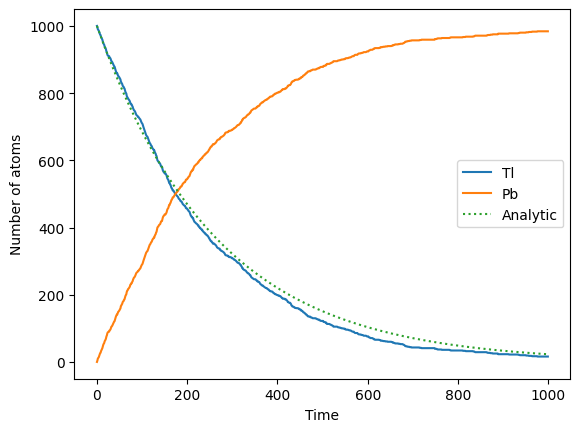

In [3]:
# Make the graph
plt.plot(tpoints, Tlpoints, label='Tl')
plt.plot(tpoints, Pbpoints, label='Pb')
plt.plot(tpoints, Nt(Tlpoints[0], tpoints), ls=':', label='Analytic')
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.legend(loc='best')
plt.show()

In [1]:
from numpy import sqrt,log,cos,sin,pi
from math import tan
from numpy.random import random
import numpy as np

# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 1000000

In [2]:
# Function to generate two Gaussian random numbers
def gaussian(ndim=1,num=1):
    if ndim == 1:
        r = sqrt(-2*sigma*sigma*log(1-random(num)))
        return r
    elif ndim == 2:
        r = sqrt(-2*sigma*sigma*log(1-random(num)))
        theta = 2*pi*random()
        x = r*cos(theta)
        y = r*sin(theta)
        return x,y
    else:
        return 0

In [3]:
theta = pi/2
bcrit = Z*e*e/(2*pi*epsilon0*E)/tan(theta/2)
count = np.sum(gaussian(num=N) < bcrit)

In [4]:
print("%d particles were reflected out of %d" % (count,N))

1572 particles were reflected out of 1000000


In [5]:
# Main program
count = 0
for i in range(N):
    x,y = gaussian(ndim=2, num=1)
    b = sqrt(x*x+y*y)
    if b<Z*e*e/(2*pi*epsilon0*E)/tan(theta/2):
        count += 1

KeyboardInterrupt: 

In [ ]:
print("%d particles were reflected out of %d" % (count,N))